In [155]:
def cost(w):
    return ((w-3)**2)+5

def derivative(w):
    ################ Write code
    return 2*(w-3)
    ################

def gradient_descent(initial_w = 0, alpha = 0.05, number_steps = 10):
    """
    w : initial value of parameter w
    alpha : step size
    """
    W = [initial_w]
    for i in range(number_steps):
        ################ Write code
        w = W[-1] # last/current w
        w = w - alpha * derivative(w)
        ################
        W.append(w)

    return np.array(W)

Text(0.5, 1.0, 'alpha = 0.1')

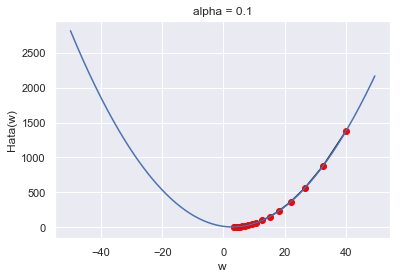

In [165]:
a = 0.1
W = gradient_descent(initial_w = 40, alpha = a, number_steps = 20)
t = np.arange(-50,50,0.5)

plt.plot(W,cost(W),'k')
plt.scatter(W,cost(W), color = 'red')
plt.plot(t,cost(t))
plt.xlabel('w'); plt.ylabel('Hata(w)'); plt.title("alpha = " + str(a))

In [166]:
d = 3     # oznitelik sayisi
n = 100   # ornek sayisi

X = np.random.randint(0,100, size = (d,n))
w_gizli = np.ones((d,1))
b_gizli = 10
y = np.dot(w_gizli.T, X) + b_gizli

oznitelik_isimleri = ['not'+str(i) for i in range(d)] + ['toplam']
veri = pd.DataFrame(data = np.concatenate((X,y)).T, columns  = oznitelik_isimleri)

print(veri.shape)
veri.head()

(100, 4)


,not0,not1,not2,toplam
0,49.0,35.0,39.0,133.0
1,15.0,88.0,28.0,141.0
2,52.0,1.0,28.0,91.0
3,60.0,37.0,82.0,189.0
4,45.0,46.0,28.0,129.0


In [167]:
print("X.shape: ", X.shape)
print("w.shape: ", w_gizli.shape)
print("b.shape: ", 1)

X.shape:  (3, 100)
w.shape:  (3, 1)
b.shape:  1


In [170]:
X[:,:10]

array([[49, 15, 52, 60, 45, 31, 41,  8, 58, 38],
       [35, 88,  1, 37, 46, 18, 75, 17, 31,  3],
       [39, 28, 28, 82, 28, 59, 29, 55, 23, 11]])

In [176]:
b

0.661139807936399

In [178]:
h = np.dot(w.T,X) + b # y_hat hypothesis

In [191]:
d = 3     # oznitelik sayisi
n = 100   # ornek sayisi

alpha =  0.00001
Js = []
w  = np.random.rand(d,1) # rastgele d agirlik parametre degeri
b = np.random.rand()     # ratgeele 1 bias paarmetre degeri

for i in range(3000000):
    # Forward Propagate: Calculate our outcome y_hat = h
    ################ Write code
    h = np.dot(w.T,X) + b
    ################
    
    # Calculate Gradients
    ################ Write code
    dw = (1/n) * np.dot(X, (h - y).T) # dj/dw
    db = (1/n) * np.sum(h - y) # dj/db
    ################
    
    # Back Propagate: Update parametere with Gradient Descent
    ################ Write code
    w = w - alpha * dw
    b = b - alpha * db
    ################ 
    
    if i%100:
        ################ Write code
        cost = (1 / (2 * n)) * np.sum(np.power((h - y),2))
        ################
        
        Js.append(cost)
    
print("w: {}\nb:{}".format(w,b))

w: [[1.00463352]
 [1.00425392]
 [1.00421791]]
b:9.316924033903437


Text(0, 0.5, '$J(w,b)$')

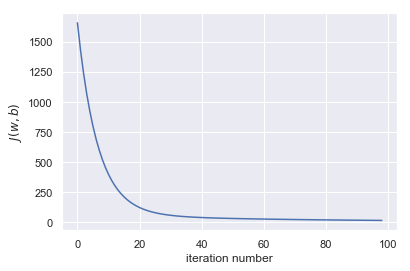

In [184]:
plt.plot(Js)
plt.xlabel('iteration number')
plt.ylabel('$J(w,b)$')

In [192]:
print("Parametre found")
print("\tw = {}.T".format(w.T))
print("\tb = {}".format(b))

Parametre found
	w = [[1.00463352 1.00425392 1.00421791]].T
	b = 9.316924033903437


In [186]:
print("True Parametre found")
print("\tw = {}.T".format(w_gizli.T))
print("\tb = {}".format(b_gizli))

True Parametre found
	w = [[1. 1. 1.]].T
	b = 10


In [255]:
class agent():
    def __init__(self,ID, X, y):
        self.ID = ID
        self.d, self.n = X.shape
        self.X, self.y = X, y
        
        self.w  = np.random.rand(d,1) 
        self.b = np.random.rand() 
        
        self.score = self.performance()
    
    def performance(self):
        ################ Write code
        h = np.dot(w.T,X) + b
        cost = (1 / (2 * n)) * np.sum(np.power((h - y),2))
        ################ Write code
        return 1/(1+cost)
    
    def immitate(self, other): # immitate betters
        copy_point = np.random.randint(self.d)
        ################ Write code
        self.w[copy_point] = other.w[copy_point]
        self.b = other.b
        ################ Write code
        self.score = self.performance()
                  
    def innovate(self, pr = 0.25):# Go on your own - mutation
        if np.random.rand() < pr:
            mutation_point = np.random.randint(self.d)
            ################ Write code
            self.w[mutation_point] = np.random.rand(1,1)
            self.b = np.random.rand()
            ################ Write code
            self.score = self.performance()

In [256]:
class abm():
    def __init__(self, X, y, N = 100, time = 1000):
        self.X, self.y, self.N, self.time = X, y, N, time
        self.population = [agent(i, X, y) for i in range(self.N)]
    
    def social_optimisation(self):
        for i in range(self.time):
            iA, iB = np.random.choice(range(self.N), 2, replace=False)
            A, B = self.population[iA], self.population[iB]
            
            if A.score > B.score: B.immitate(A)
            else: A.immitate(B)
                
            A.innovate();B.innovate()   
            
    def best_agent(self):   
        scores = [A.score for A in self.population]
        ibest = scores.index(max(scores))
        return self.population[ibest]
        
    def fit(self):
        self.social_optimisation()

In [257]:
world = abm(X = X, y = y, N = 50, time = 10000)

In [258]:
[a.w.T for a in world.population]

[array([[0.74578277, 0.76374034, 0.86684078]]),
 array([[0.80363547, 0.49500561, 0.54611499]]),
 array([[0.65477931, 0.23009845, 0.60329088]]),
 array([[0.85166918, 0.79506957, 0.82046355]]),
 array([[0.36843846, 0.70837256, 0.81084152]]),
 array([[0.81018973, 0.34970928, 0.18445583]]),
 array([[0.38549753, 0.62140878, 0.35074902]]),
 array([[0.41786355, 0.14620006, 0.46326945]]),
 array([[0.17542257, 0.0407989 , 0.13898413]]),
 array([[0.50005775, 0.3891202 , 0.20075594]]),
 array([[0.52980543, 0.42591946, 0.24338526]]),
 array([[0.75763873, 0.90847351, 0.24765122]]),
 array([[0.47650948, 0.5956722 , 0.29805247]]),
 array([[0.12488887, 0.03481036, 0.36541229]]),
 array([[0.39254228, 0.19466058, 0.34121186]]),
 array([[0.03857051, 0.52829521, 0.76771502]]),
 array([[0.54716469, 0.37069976, 0.39789808]]),
 array([[0.32065224, 0.54231553, 0.85080264]]),
 array([[0.33591031, 0.48424886, 0.44237049]]),
 array([[0.60737063, 0.77283584, 0.87534343]]),
 array([[0.21268505, 0.0592193 , 0.30519

In [259]:
world.fit()

In [260]:
[a.w.T for a in world.population]

[array([[0.57077772, 0.48016814, 0.04121909]]),
 array([[0.30315569, 0.45440653, 0.77631785]]),
 array([[0.30315569, 0.00940697, 0.57503374]]),
 array([[0.4661784 , 0.46215362, 0.77631785]]),
 array([[0.11408565, 0.44830183, 0.75460632]]),
 array([[0.58252388, 0.31534913, 0.77631785]]),
 array([[0.06724325, 0.67863599, 0.34113298]]),
 array([[0.92999785, 0.44830183, 0.75557157]]),
 array([[0.7639116 , 0.42820498, 0.04121909]]),
 array([[0.47266188, 0.44830183, 0.04121909]]),
 array([[0.66432904, 0.77167196, 0.07686309]]),
 array([[0.83069548, 0.67912724, 0.91083305]]),
 array([[0.09034824, 0.91885917, 0.34564506]]),
 array([[0.90983917, 0.30087764, 0.75420199]]),
 array([[0.37595585, 0.77167196, 0.75024031]]),
 array([[0.17117608, 0.91885917, 0.77631785]]),
 array([[0.07194656, 0.77167196, 0.40707557]]),
 array([[0.34594917, 0.91231771, 0.75557157]]),
 array([[0.17117608, 0.89320833, 0.77631785]]),
 array([[0.80731103, 0.31884096, 0.16632727]]),
 array([[0.14059719, 0.82503049, 0.40961

In [261]:
print("True Parametre found")
print("\tw = {}.T".format(w_gizli.T))
print("\tb = {}".format(b_gizli))

True Parametre found
	w = [[1. 1. 1.]].T
	b = 10


In [262]:
print("True Parametre found")
print("\tw = {}.T".format(world.best_agent().w.T))
print("\tb = {}".format(world.best_agent().b))

True Parametre found
	w = [[0.57077772 0.48016814 0.04121909]].T
	b = 0.39822058827676277
